Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.

Для проведения EDA выбран датасет https://www.kaggle.com/palanjali007/amazons-top-50-bestselling-novels-20092020

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Amazon_books.csv')

In [3]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
595,Live Free Or Die: America (and the World) on t...,Sean Hannity,4.8,20153,15,2020,Non Fiction
596,Burn After Writing,Sharon Jones,4.6,26423,8,2020,Non Fiction
597,Get Out of Your Head: Stopping the Spiral of T...,Jennie Allen,4.7,12879,14,2020,Non Fiction
598,Human Body Activity Book for Kids: Hands-On Fu...,Katie Stokes,4.7,14128,5,2020,Non Fiction


In [6]:
df = df.rename(columns={'User Rating': 'User_rating'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         600 non-null    object 
 1   Author       600 non-null    object 
 2   User_rating  600 non-null    float64
 3   Reviews      600 non-null    int64  
 4   Price        600 non-null    int64  
 5   Year         600 non-null    int64  
 6   Genre        600 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 32.9+ KB


In [8]:
df.describe()

,User_rating,Reviews,Price,Year
count,600.000000,600.000000,600.00000,600.000000
mean,4.627333,13941.730000,12.92000,2014.500000
std,0.225324,14652.813591,10.49717,3.454933
min,3.300000,37.000000,0.00000,2009.000000
25%,4.500000,4586.500000,7.00000,2011.750000
50%,4.700000,9059.500000,11.00000,2014.500000
75%,4.800000,19587.500000,16.00000,2017.250000
max,4.900000,120727.000000,105.00000,2020.000000


In [76]:
# распределение оценок читателей


<AxesSubplot:ylabel='Frequency'>

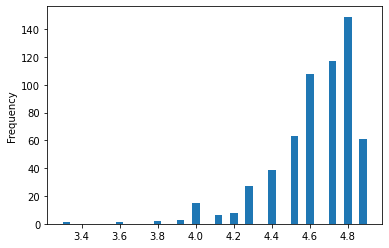

In [74]:
df.User_rating.plot(kind='hist', 
                     bins=40,
                     title='',
                     xlabel='',
                     ylabel='')

In [75]:
import seaborn as sns

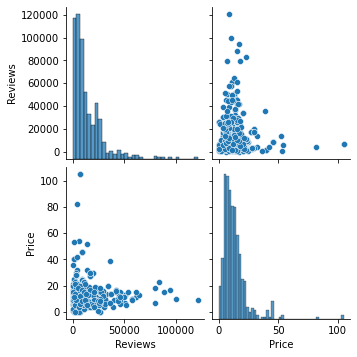

In [81]:
sns.pairplot(df[['Reviews', 'Price']])

Text(0.5, 1.0, 'Correlation between Price and Revews')

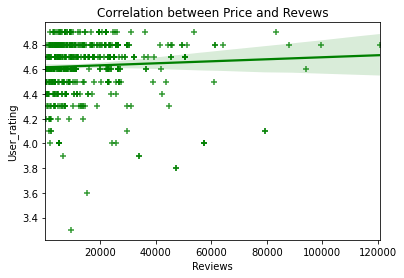

In [127]:
ax = sns.regplot(data=df, x='Reviews', y='User_rating', color='green', marker='+')
ax.set_title('Correlation between Price and Revews')

Text(0.5, 1.0, 'Correlation between Price and Revews')

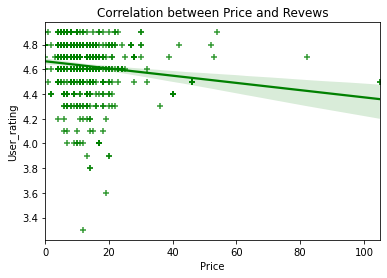

In [128]:
ax = sns.regplot(data=df, x='Price', y='User_rating', color='green', marker='+')
ax.set_title('Correlation between Price and Revews')

In [129]:
df[['Year', 'Reviews']].groupby('Year').sum().sort_values(by='Reviews', ascending = False).head(10)

,Reviews
Year,
2020,1790733
2019,794917
2014,792997
2015,711669
2016,709800
2018,696521
2013,654907
2012,654546
2017,644420
